Problem Statement:

The challenge of understanding and grouping customers based on their transactional and behavioral data. The dataset includes various features such as spending patterns, credit card usage, and payment behaviors. Without proper segmentation, businesses face difficulties in tailoring their services, optimizing marketing efforts, and allocating resources effectively. This lack of understanding often results in missed opportunities to engage with customers meaningfully and maximize business outcomes.

Objective:

The main objective of my project is to develop a customer segmentation model that groups customers into distinct categories based on their financial activities and purchasing behaviors. By doing so, I aim to:

Enable businesses to create targeted and personalized marketing strategies.

Help improve customer satisfaction by understanding the specific needs and preferences of each segment.

Assist in identifying high-value customers for loyalty programs and retention efforts.

Optimize resource allocation for credit limits, payment terms, and promotional campaigns.

Provide actionable insights that can be leveraged to drive data-driven decisions and enhance business performance.

This segmentation model will be a valuable tool for businesses to better understand their customers and make informed, strategic decisions. It will - - serve as a key component of my project, showcasing the power of data analysis in solving real-world business challenges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

C:\Users\neera\AppData\Local\Temp\ipykernel_17132\590728519.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


How These Features Help in Segmentation:

Features like PURCHASES, BALANCE, and CREDIT_LIMIT help identify high-spending customers versus low-spending ones.
CASH_ADVANCE and related frequency features can segment customers based on dependency on cash withdrawals.
Behavioral metrics like PRC_FULL_PAYMENT and TENURE can distinguish responsible users from those at financial risk.
Frequency-based features like PURCHASES_FREQUENCY and ONEOFF_PURCHASES_FREQUENCY highlight activity patterns, crucial for understanding different spending behaviors.
By leveraging these features, meaningful customer groups can be identified for targeted business strategies. Let me know if you'd like further details or assistance with this!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASES                 8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
"""Observations:

The dataset contains 18 columns and 8950 rows, all non-null.
"Cust_Id" dtype is object.
"Cash_Advance_Trx", "Purchases_Trx", and "Tenure" dtypes are int64. The others are float64."""

'Observations:\n\nThe dataset contains 18 columns and 8950 rows, all non-null.\n"Cust_Id" dtype is object.\n"Cash_Advance_Trx", "Purchases_Trx", and "Tenure" dtypes are int64. The others are float64.'

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONE_OFF_PURCHASES                     0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# '''Observations:

There is 313 missing values in "Minimum_Payments" and 1 missing value in "Credit_Limit"'''.

# Univariate Analysis:

For continous variable
purpose : to understand the distribution of a numerical features

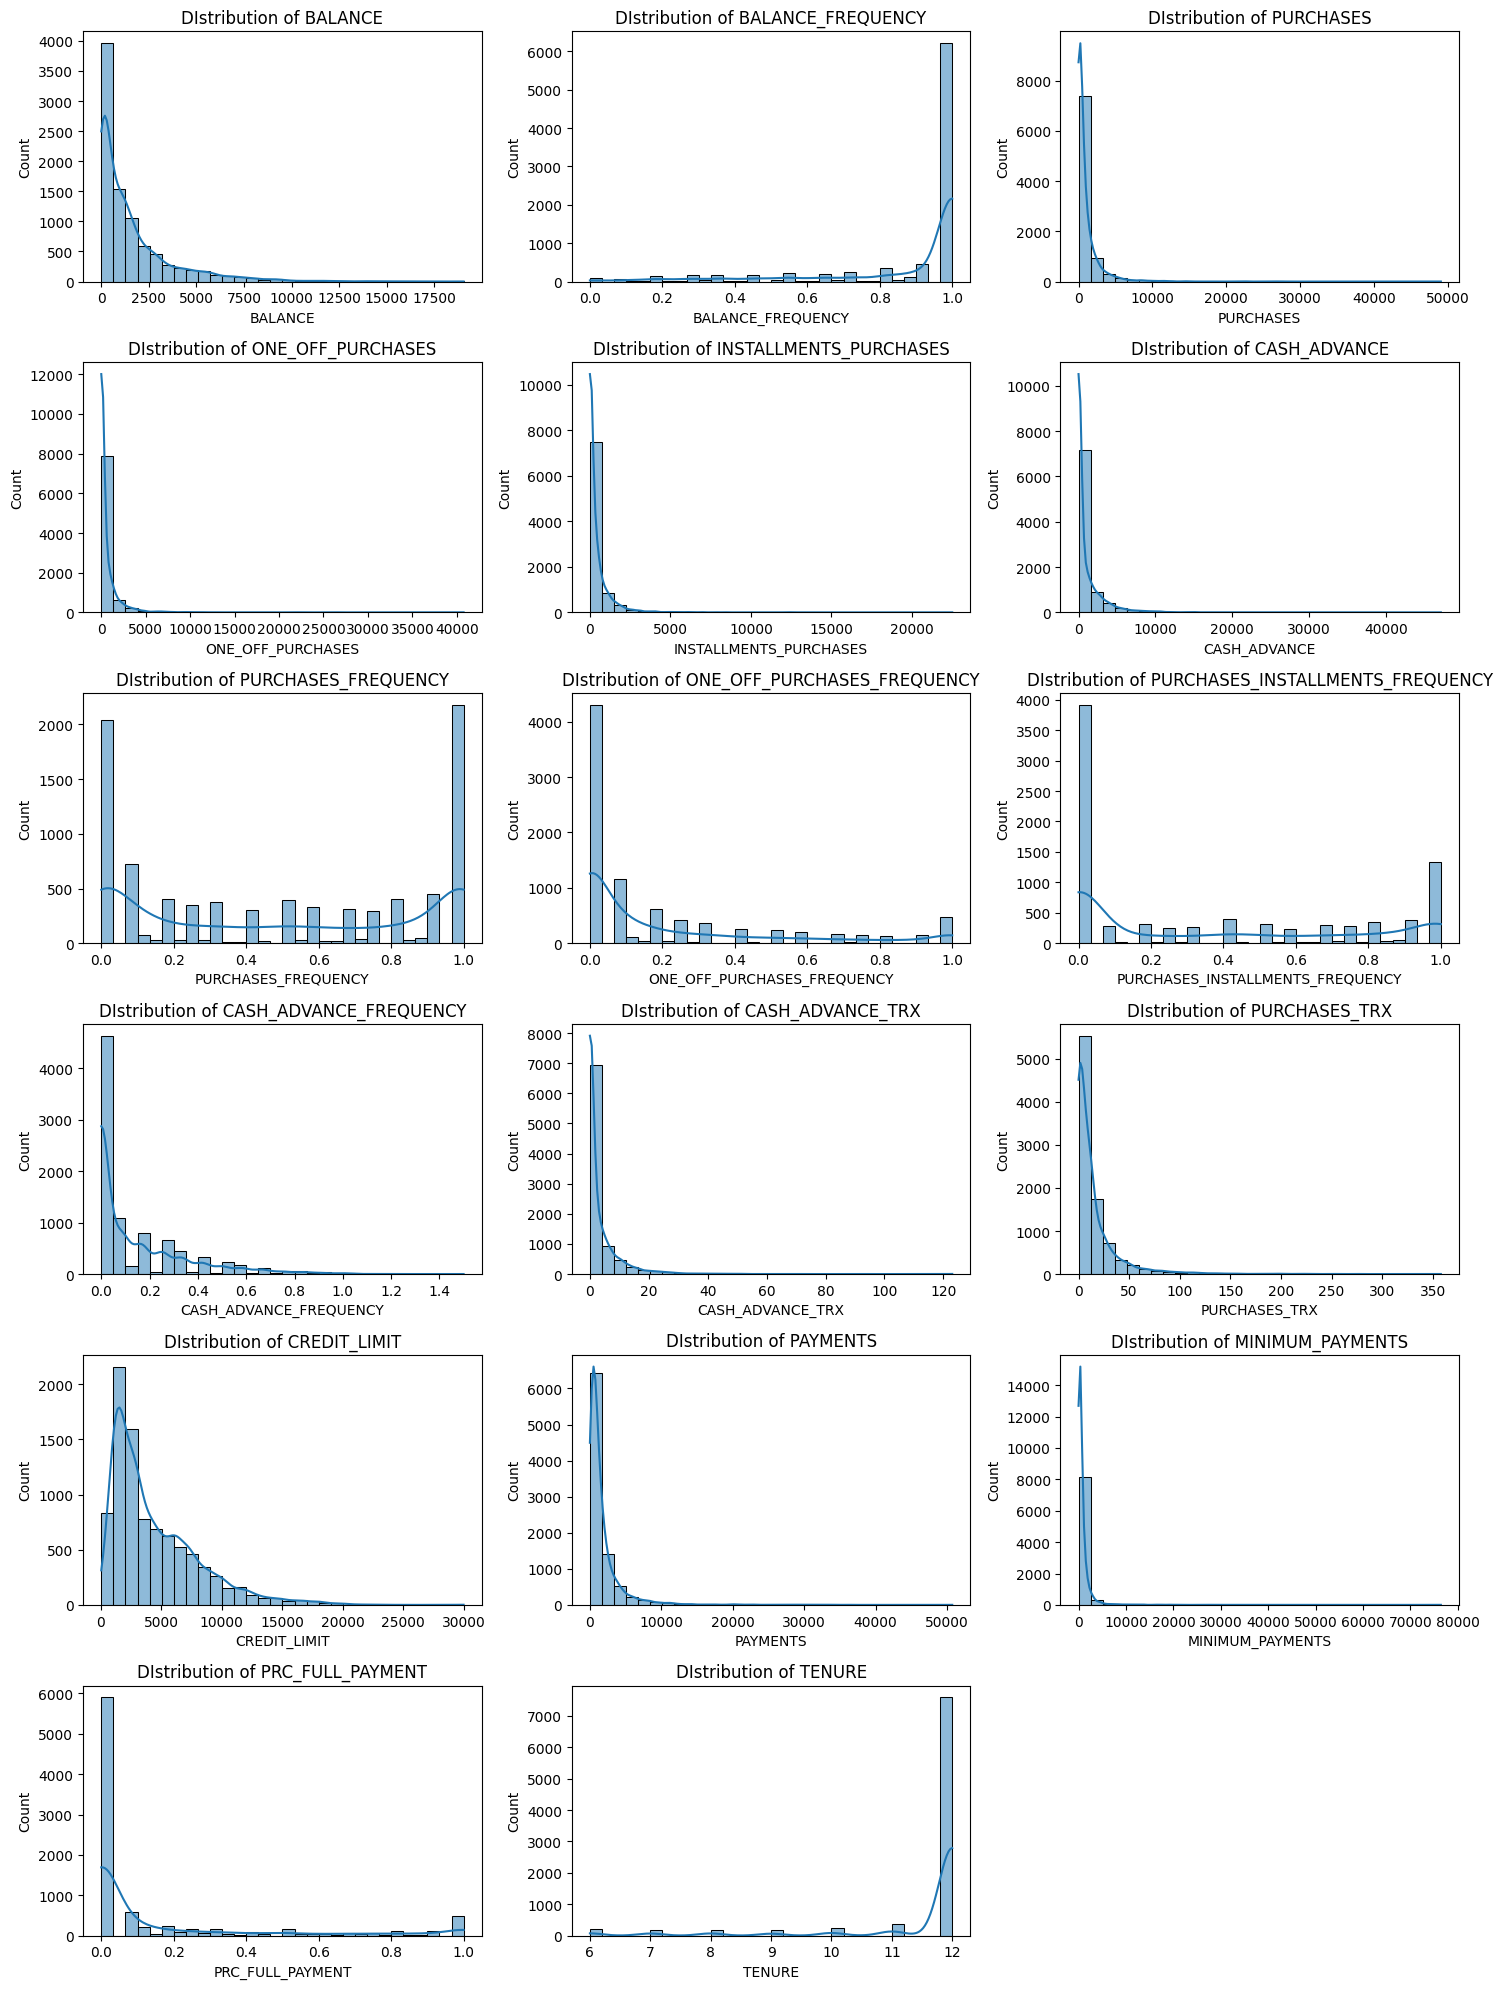

In [6]:
# Plot distribution
numerical_cols= df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,20))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(6,3,i)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f"DIstribution of {col}")

plt.tight_layout()
plt.show()

# Key Insights from above histogram
High-Value Customers:

1. Most customers have low balances and purchases, but a small group spends significantly more and has higher balances. These are high-value customers who can be targeted with premium rewards and personalized offers.
Spending Behavior:

2. Features like BALANCE, PURCHASES, and CREDIT_LIMIT highlight differences in spending capacity:
High spenders are ideal for exclusive marketing campaigns.
Customers with high balances and low credit limits may be nearing financial limits, requiring caution.
Cash Advances:

3. Most customers rarely use cash advances, suggesting they rely on credit cards for purchases, not emergency cash.
Those who frequently use cash advances might be under financial stress, posing higher credit risk.
Installment Payments:

4. Many customers prefer installments for their purchases, indicating a focus on budget-friendly payment options.
Offering installment-based plans (e.g., no-interest financing) could drive more engagement.
Repayment Habits:

5. Few customers pay their full balance regularly (PRC_FULL_PAYMENT is low), while many make only minimum payments. This signals:
Profit opportunity from interest accrual for issuers.
Potential credit risk for customers relying on minimum payments.
Customer Tenure:

6. Most customers have been with the credit card for 12 months, showing stable customer retention. Further analysis can distinguish loyal, high-value customers from less active ones.

These insights can help businesses improve customer segmentation, optimize resources, and enhance revenue:

1. Target High Spenders: Create loyalty rewards and personalized campaigns for high-value customers.
2. Manage Risks: Monitor customers who rely on cash advances or make only minimum payments to prevent credit risks.
3. Promote Installments: Offer installment plans to attract budget-conscious customers.
4. Engage Low-Activity Customers: Use cashback or discounts to increase activity among less active users.   

For Categorical Variables:
Purpose:

Analyze the frequency of categorical variables.

In [7]:
df["CUST_ID"].nunique()  

8950

# Bivariate Analysis
Numerical vs Numerical

In [8]:
data=df.drop("CUST_ID",axis=1)

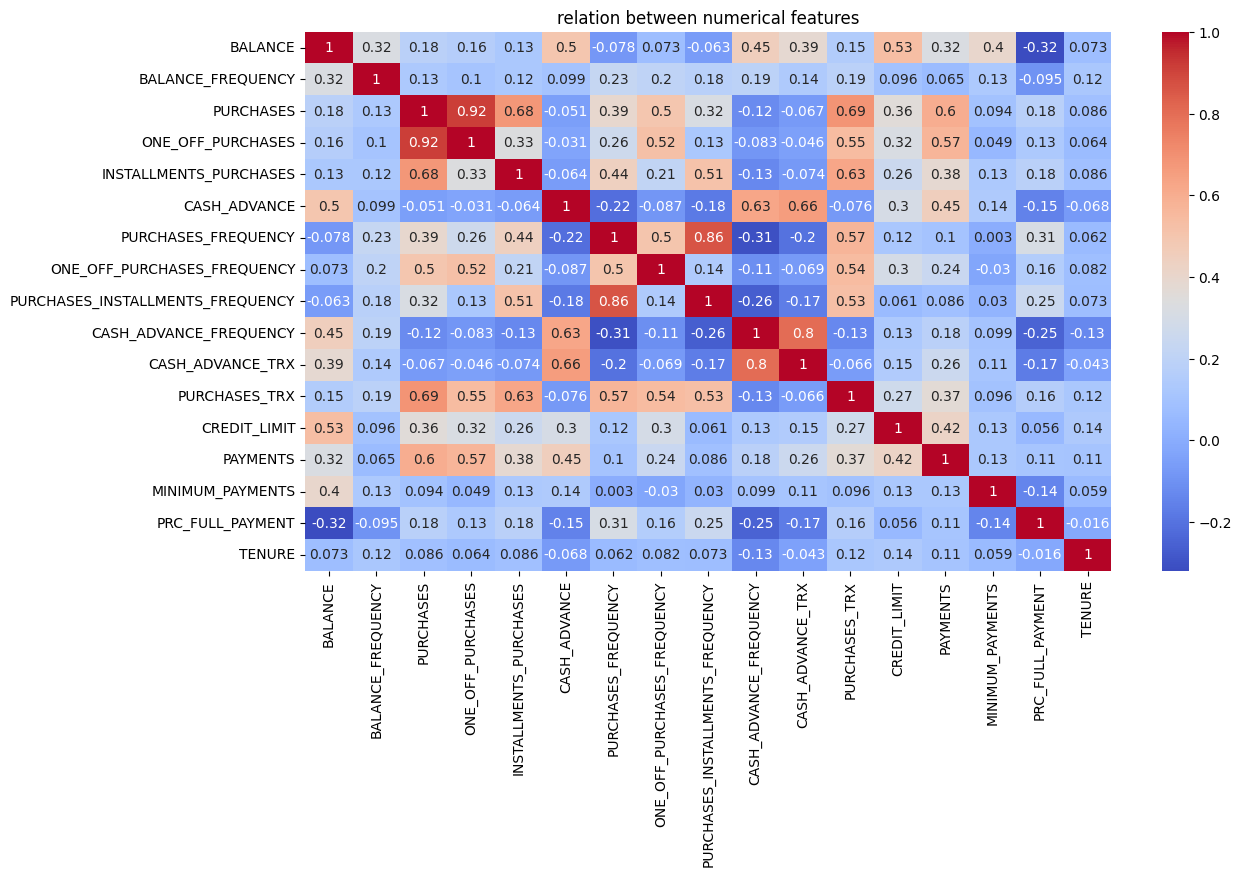

In [9]:
correlation=data.corr()
plt.figure(figsize=(13,7))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("relation between numerical features")
plt.show()

# Key Insights from the Correlation Heatmap:

1. Strong Positive Correlations:

PURCHASES and ONEOFF_PURCHASES (0.92): Customers with high total purchases often make large one-time purchases.
PURCHASES and PURCHASES_TRX (0.69): Higher total purchases are associated with a higher number of transactions.
INSTALLMENTS_PURCHASES and PURCHASES_TRX (0.63): Frequent transactions are linked to installment-based purchases.
CREDIT_LIMIT and BALANCE (0.53): Customers with higher credit limits tend to have higher balances.

2. Moderate Positive Correlations:

PAYMENTS and PURCHASES (0.57): Customers making more payments also tend to spend more.
MINIMUM_PAYMENTS and BALANCE (0.4): Higher balances often lead to higher minimum payments.

3. Negative Correlations:

PRC_FULL_PAYMENT and BALANCE (-0.32): Customers who frequently pay their balances in full tend to have lower balances.
PRC_FULL_PAYMENT and MINIMUM_PAYMENTS (-0.25): Customers who pay in full rarely make just the minimum payment.
Cash Advances:

CASH_ADVANCE and BALANCE (0.5): Customers taking more cash advances often maintain higher balances.
CASH_ADVANCE and CASH_ADVANCE_TRX (0.8): High cash advance amounts are strongly linked to a higher number of cash advance transactions.

# Business Insights:

Segment High Spenders:

Customers with high PURCHASES and frequent PURCHASES_TRX can be targeted for rewards and cashback programs.
Monitor Cash Advance Users:

Customers heavily relying on cash advances may need financial assistance or adjusted credit terms.
Identify Responsible Payers:

Customers with high PRC_FULL_PAYMENT are likely low-risk and can be offered premium products or services.
Focus on Installment Purchasers:

Promote installment-based offers to customers with frequent PURCHASES_TRX and high INSTALLMENTS_PURCHASES.
This heatmap reveals strong relationships that can guide segmentation and targeted strategies

In [10]:
df.head(1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


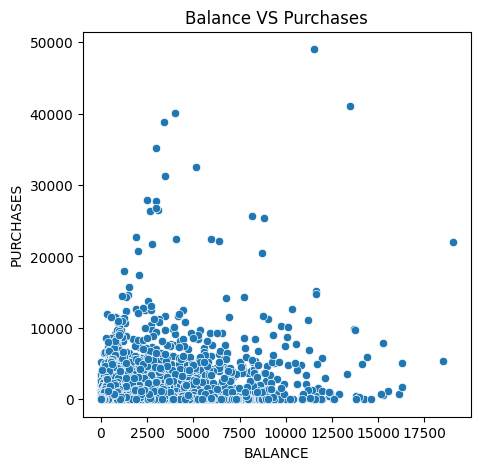

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="BALANCE",y="PURCHASES",data=df)
plt.title("Balance VS Purchases")
plt.show()

# Insights from Scatter Plot:

Majority Cluster: Most customers have balances under 
10,000, indicating moderate activity.
    
High Balance, Low Purchases: Some customers maintain high balances (>$10,000) with lower spending, possibly indicating overuse of credit.
Outliers: Few customers show extremely high purchases (>$40,000) or balances, representing high-value or high-risk profiles.
    
Low Engagement: Many customers have both low balances and purchases, showing minimal card usage.

# Multivariate Analysis:

relationships between multiple variables.

<Figure size 700x1000 with 0 Axes>

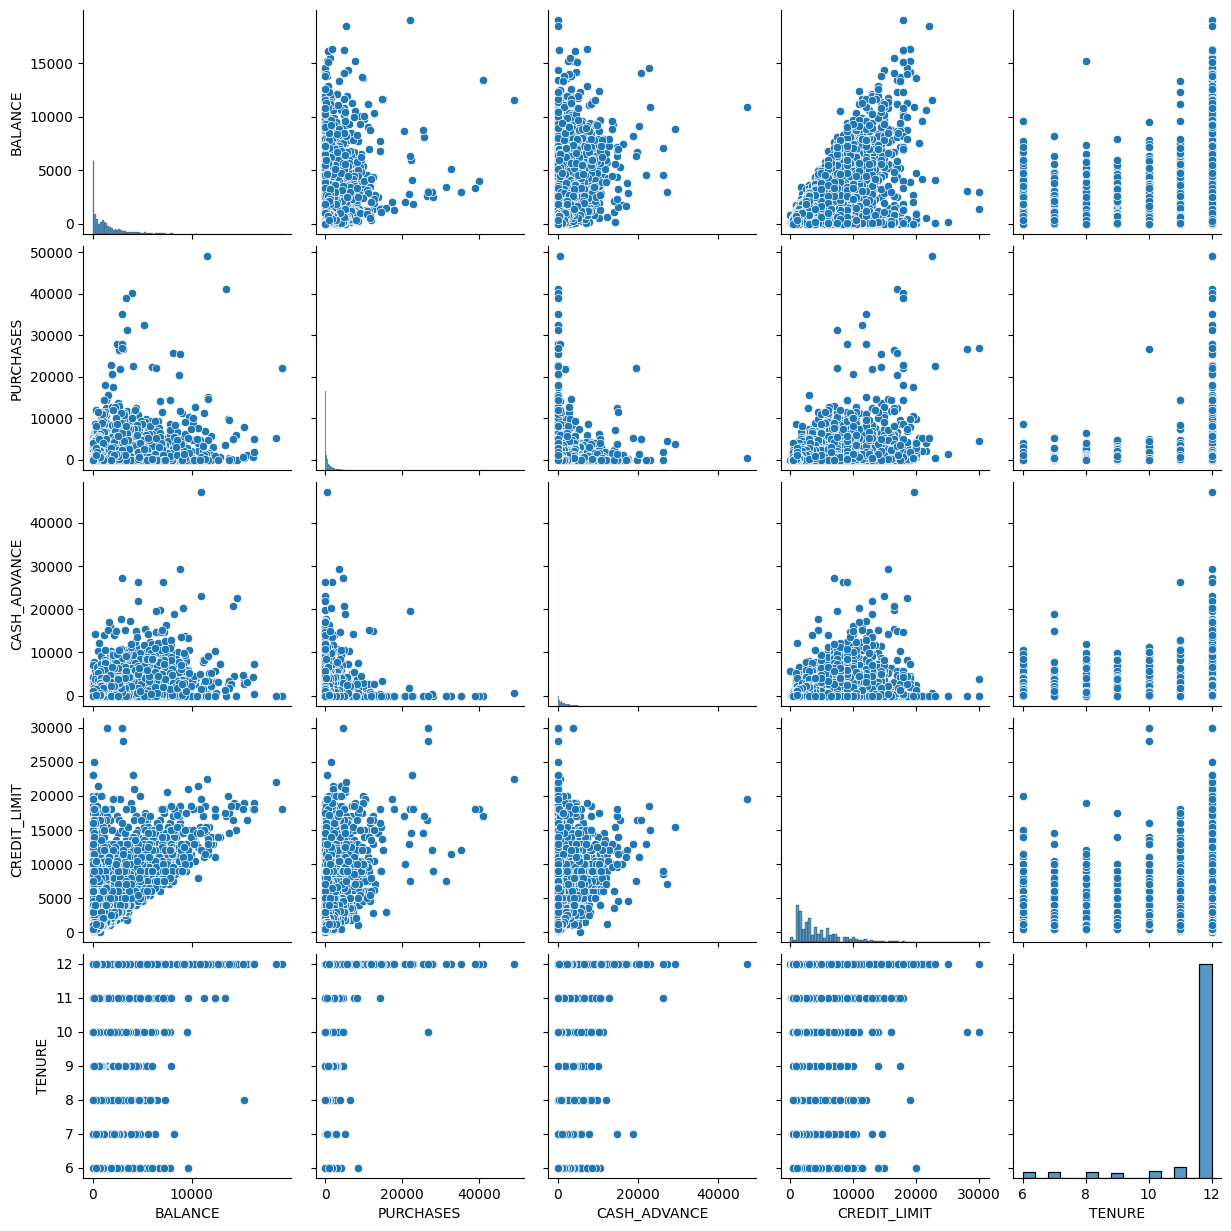

In [12]:
# pairplot for selected features
plt.figure(figsize=(7,10))
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'TENURE']
sns.pairplot(df[selected_features])
plt.show()

# Insights from the Pair Plot:

Balance and Credit Limit:

1. Strong positive correlation: Higher credit limits are associated with higher balances.
Purchases and Balance:

2. Positive but scattered relationship: Customers with higher balances tend to make more purchases, though with significant variability.
Cash Advance Usage:

3. Weak correlation with purchases or balances: Customers using cash advances do not necessarily spend more.
Tenure:

4. Minimal impact on other variables: No strong relationship between tenure and spending, balance, or credit limit.
Outliers:

Several outliers exist in all variables, particularly in purchases and cash advances, indicating high-value or high-risk customers.
These insights highlight spending patterns and relationships between key financial behaviors.

# Remove irrelevant columns
We remove CUST_ID because it’s just a unique number for each customer and doesn’t help in finding patterns or groups.

In [13]:
df=df.drop(columns=['CUST_ID'],axis=1)

In [14]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONE_OFF_PURCHASES                     0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Handel missing values
We use the median to impute missing values because it is not affected by extreme values (outliers), making it a reliable choice for datasets with skewed distributions of CREDIT_LIMIT,MINIMUM_PAYMENTS

In [16]:
imputer = SimpleImputer(strategy ='median')
data_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [17]:
data_imputed.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONE_OFF_PURCHASES                   0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONE_OFF_PURCHASES_FREQUENCY         0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#  Create new features


In [18]:
data_imputed['TOTAL_PURCHASES_TYPE'] = data_imputed['ONE_OFF_PURCHASES'] + data_imputed['INSTALLMENTS_PURCHASES']
data_imputed['CREDIT_UTILIZATION_RATIO'] = data_imputed['PURCHASES'] / data_imputed['CREDIT_LIMIT']

In [19]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,0.095400
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,0.103089
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,0.199867
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,0.013333


# Apply transformation: 

we can decided to apply Yes, Yeo-Johnson Transformation is a great choice for your dataset because it is versatile and works for:

Positive, zero, and negative values.

Highly skewed features.

Both left-skewed and right-skewed distributions. It automatically adjusts the skewness and transforms each feature towards a more Gaussian-like distribution, which is beneficial for clustering tasks like customer segmentation.

# Identify numerical columns for transformation

In [20]:
features_to_transform = [
    'BALANCE', 'PURCHASES', 'ONE_OFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONE_OFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'PRC_FULL_PAYMENT', 'TENURE'
]

In [21]:
# Initialize the PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson')

# Apply transformation to the selected features
transformed_data = data_imputed.copy()
transformed_data[features_to_transform] = power_transformer.fit_transform(data_imputed[features_to_transform])

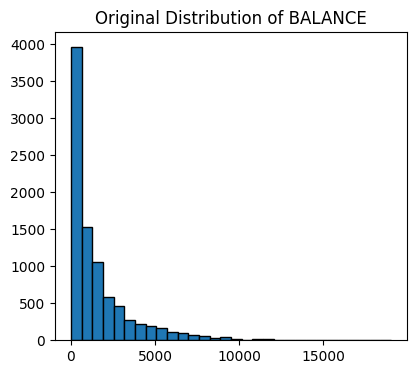

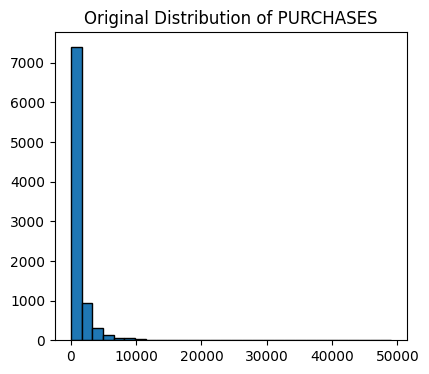

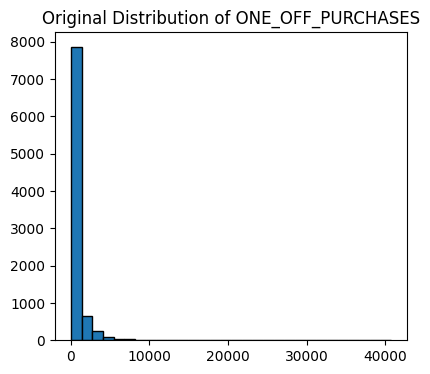

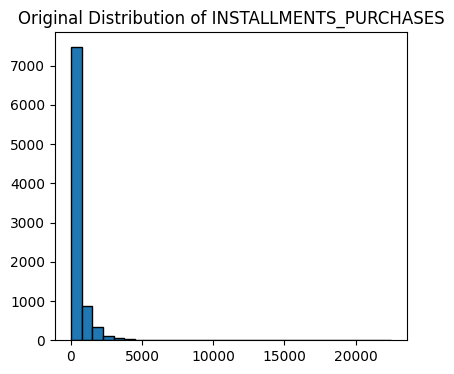

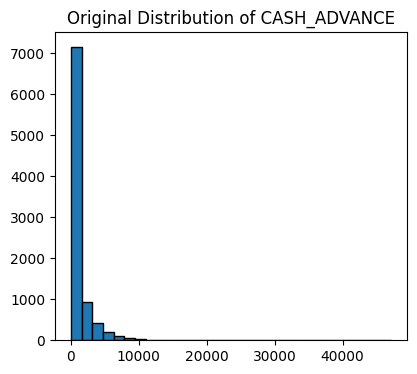

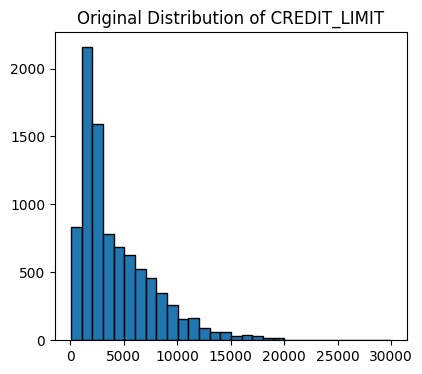

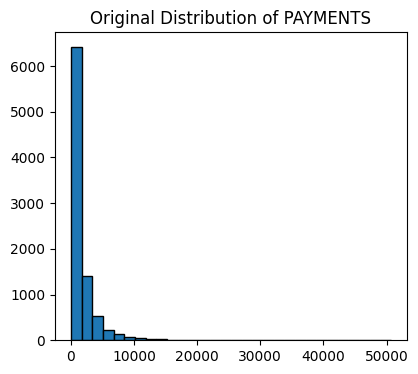

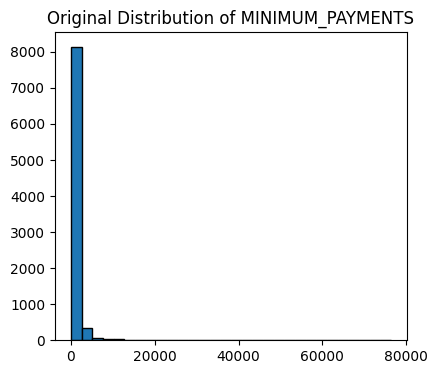

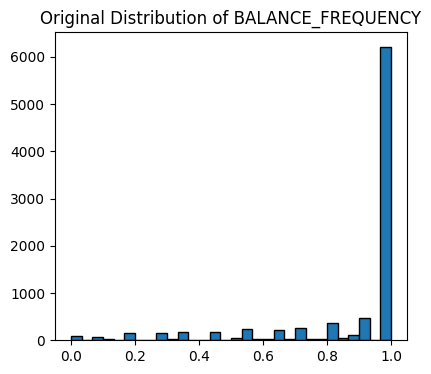

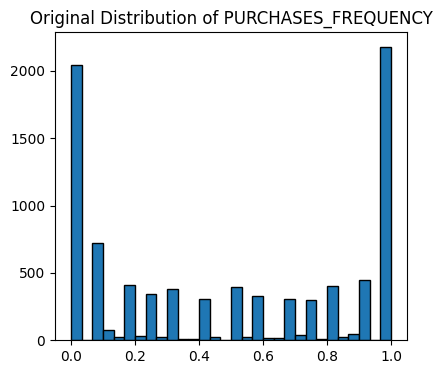

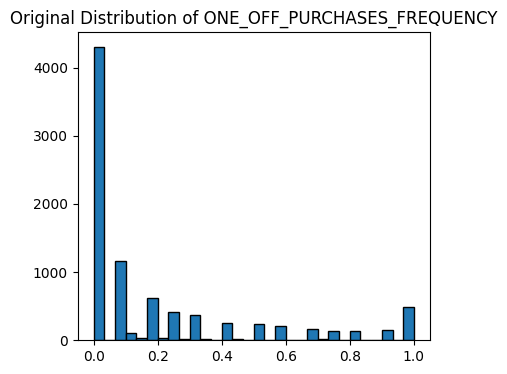

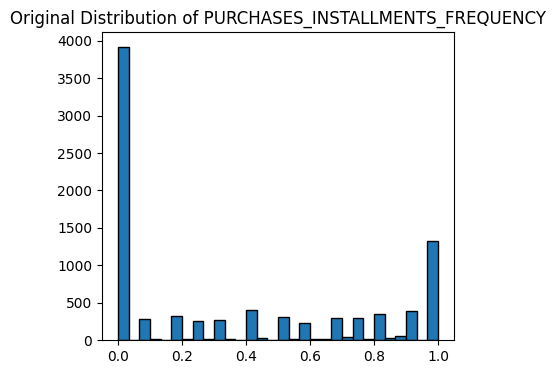

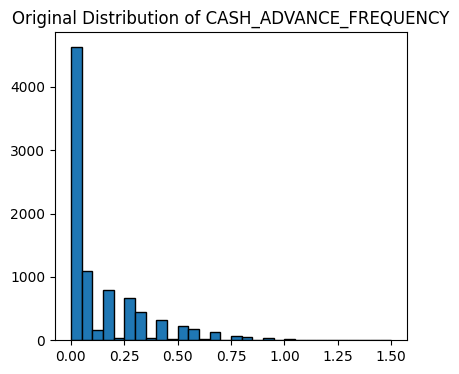

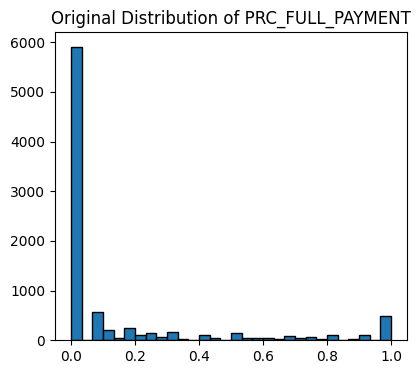

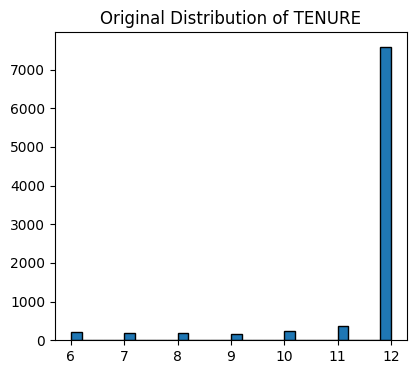

In [22]:
# Plot original vs transformed distributions for a few features
for col in features_to_transform[:19]:  # Plot the first 4 features as an example
    plt.figure(figsize=(10, 4))
    
    # Original
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f"Original Distribution of {col}")

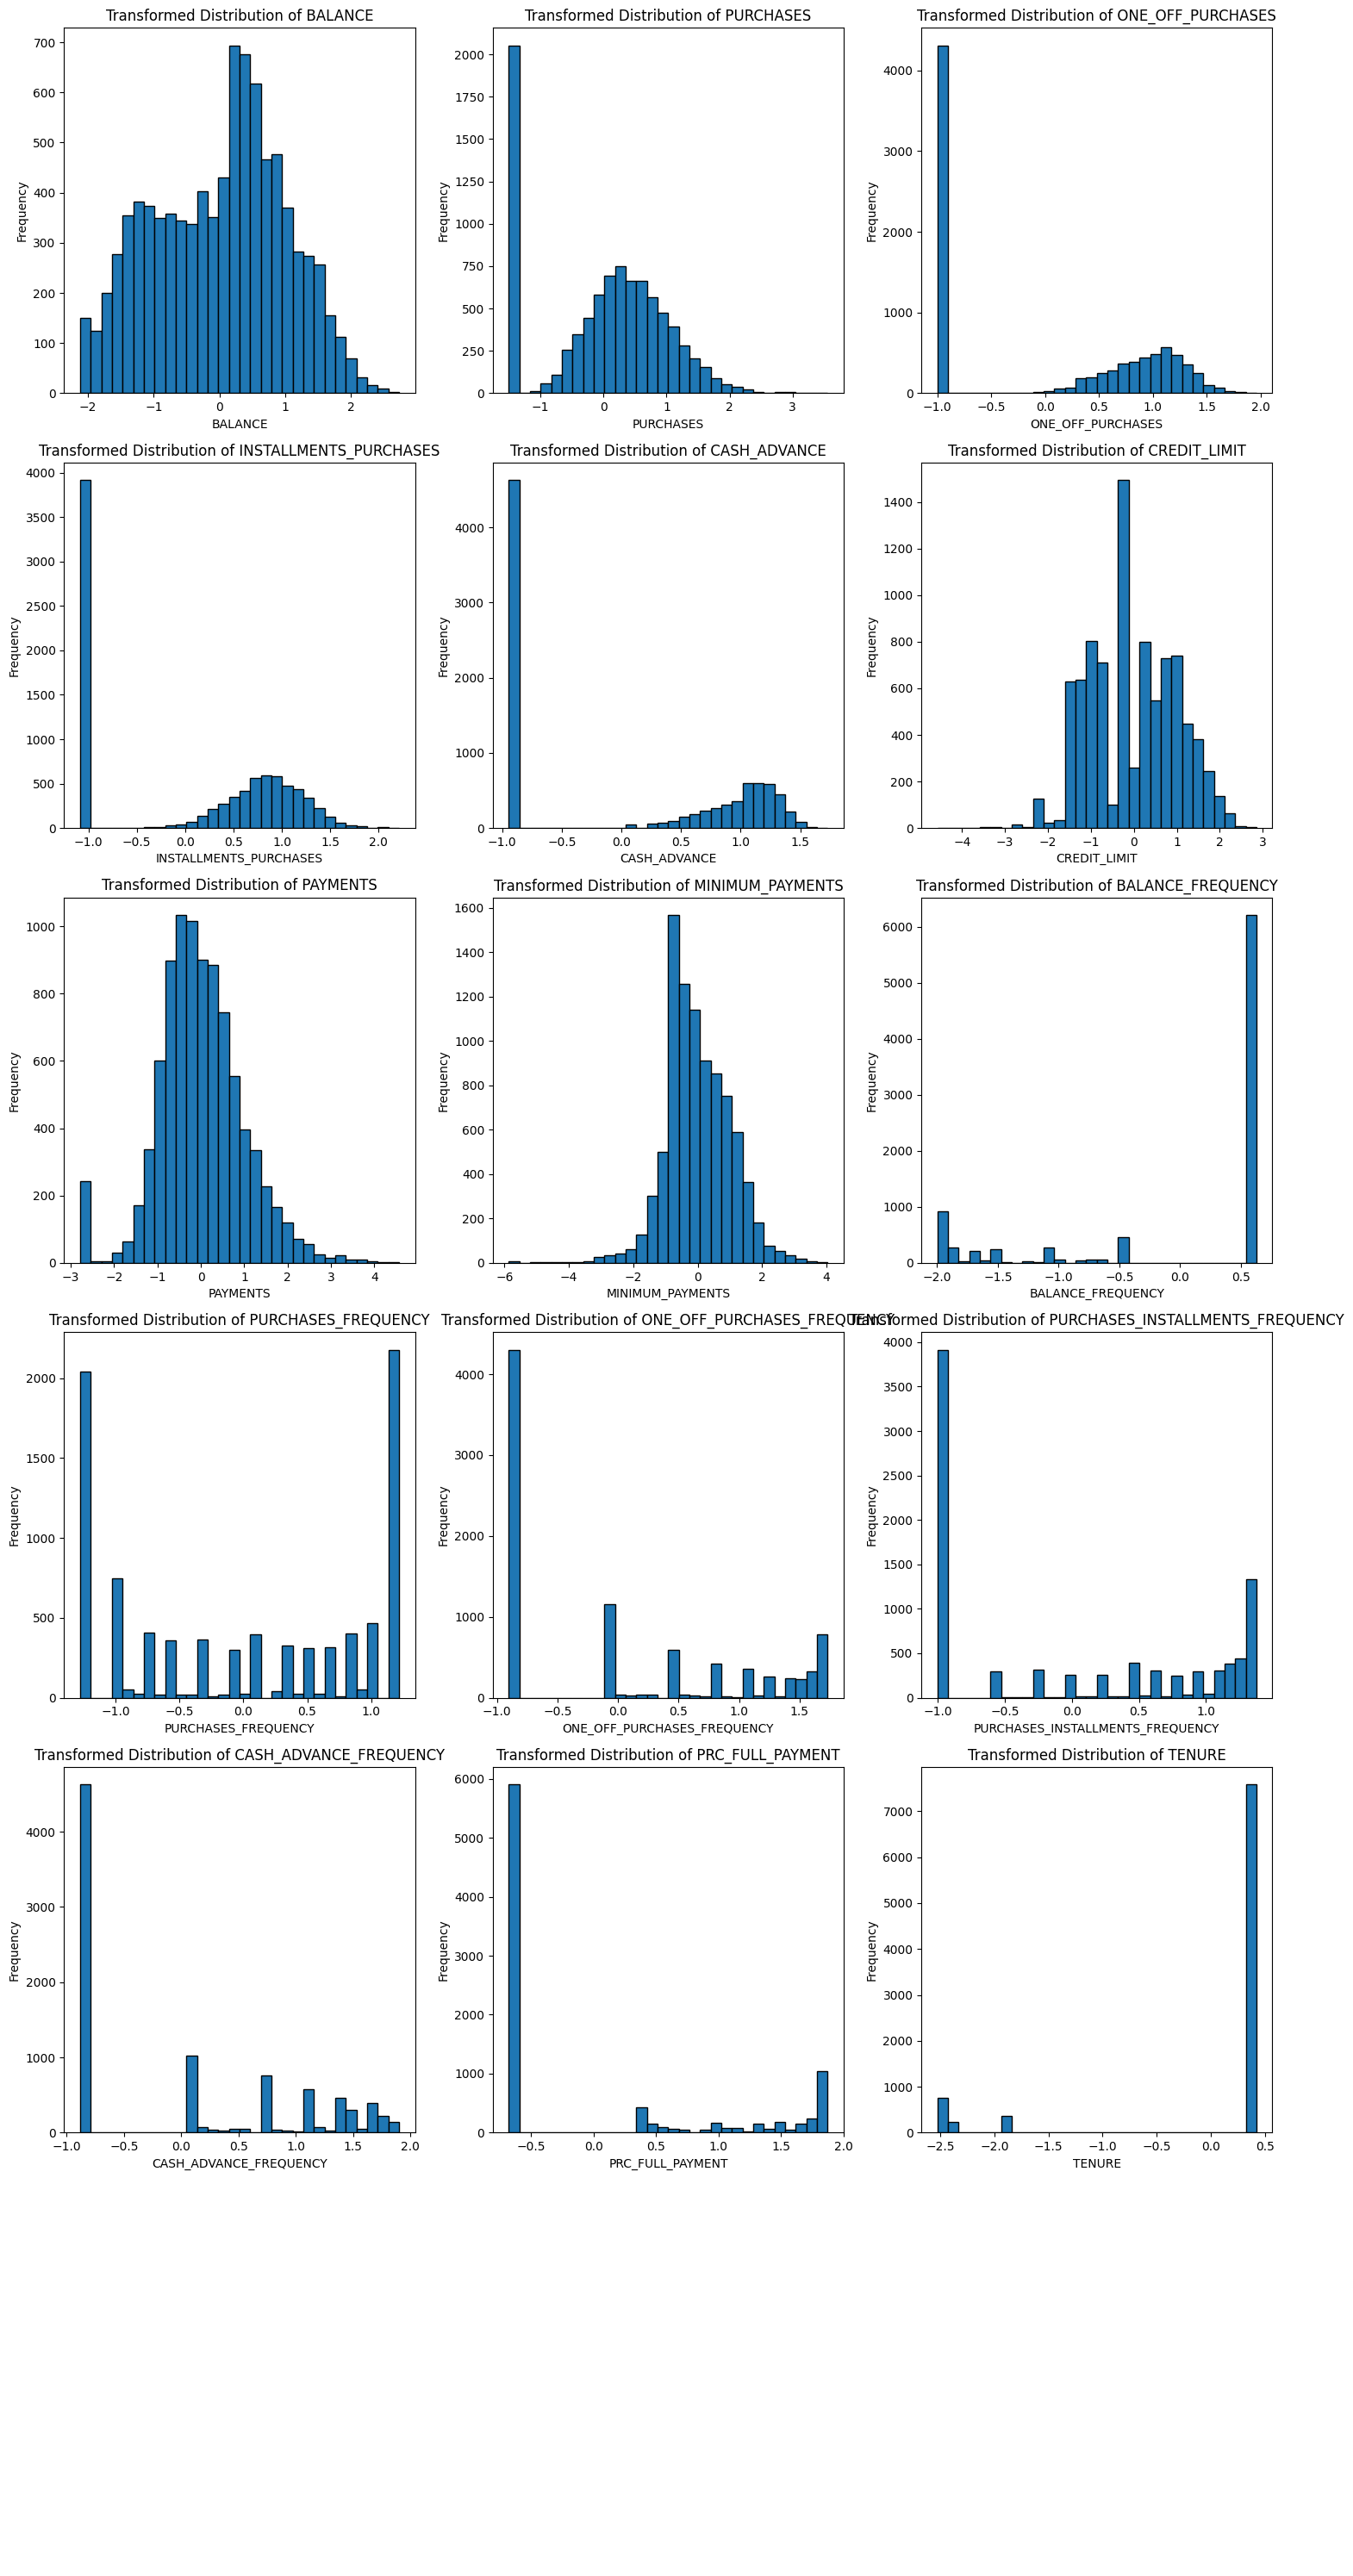

In [23]:
import matplotlib.pyplot as plt

# Set the number of rows and columns for the plot grid
num_features = len(features_to_transform)
rows = (num_features // 3) + 1  # 3 plots per row
cols = 3

# Create a grid of plots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten for easy indexing

# Plot each feature's original and transformed distributions
for idx, col in enumerate(features_to_transform):
    # Original Data
    axes[idx].hist(transformed_data[col], bins=30, edgecolor='k')
    axes[idx].set_title(f"Transformed Distribution of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,0.095400
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,0.103089
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,0.199867
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,0.013333


In [25]:
data_imputed['TOTAL_PURCHASES_TYPE'].skew()

8.143206562259174

In [26]:
data_imputed['CREDIT_UTILIZATION_RATIO'].skew()	

5.277187288850879

In [27]:
# Apply a box-cox transformation to reduce skewness further
from scipy.stats import boxcox

# Since boxcox requires positive data, ensure no zero or negative values exist
data_imputed['CREDIT_UTILIZATION_RATIO'] = data_imputed['CREDIT_UTILIZATION_RATIO'] + 1e-6  # Small constant to handle zeros

# Apply boxcox transformation
data_imputed['CREDIT_UTILIZATION_RATIO'], lambda_boxcox = boxcox(data_imputed['CREDIT_UTILIZATION_RATIO'])

# Check skewness again
credit_utilization_skew = data_imputed['CREDIT_UTILIZATION_RATIO'].skew()

# Display the updated skewness and box-cox lambda
credit_utilization_skew, lambda_boxcox

(-0.5197477269723956, 0.1895433764142446)

In [28]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


In [29]:
data_imputed.to_csv('Cleaned_Customer.csv')

# DBSCAN CLUSTERING

In [30]:
df = pd.read_csv("Cleaned_Customer.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


In [31]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324


In [32]:
##Scale the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df))

In [33]:
scaled_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,-0.425020,0.179086
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,-0.469670,-1.610714
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,-0.107804,0.208980


In [34]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  
reduce_data= pca.fit_transform(scaled_data)

In [35]:
# Check the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

Explained Variance Ratio for each component: [0.30886905 0.19020344 0.08645198 0.06765374 0.05645576 0.05301051
 0.04485097 0.03868162 0.03757212 0.02860814]
Cumulative Variance Explained: [0.30886905 0.49907248 0.58552447 0.65317821 0.70963397 0.76264448
 0.80749546 0.84617707 0.88374919 0.91235733]


In [36]:
# Check the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance)

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

Explained Variance Ratio for each component: [0.30886905 0.19020344 0.08645198 0.06765374 0.05645576 0.05301051
 0.04485097 0.03868162 0.03757212 0.02860814]
Cumulative Variance Explained: [0.30886905 0.49907248 0.58552447 0.65317821 0.70963397 0.76264448
 0.80749546 0.84617707 0.88374919 0.91235733]


# Reapply DBSCAN on reduced data

In [37]:
dbscan = DBSCAN(eps=5.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(reduce_data)

In [38]:
df['DBSCAN_Cluster'] = dbscan_labels

 # Silhouette Score

In [39]:
silhouette_avg = silhouette_score(reduce_data, dbscan_labels)
print(f"Silhouette Score after PCA: {silhouette_avg}")

Silhouette Score after PCA: 0.7756334603929651


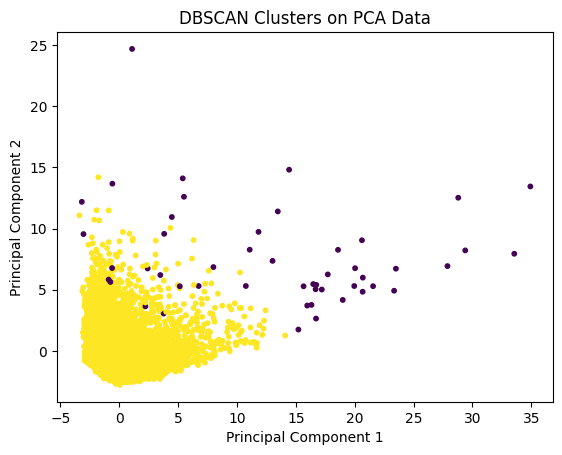

In [40]:
plt.scatter(reduce_data[:, 0],reduce_data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# The plot depicts clusters formed by DBSCAN on PCA-transformed data:

Clusters: Two clusters are evident:
1. Yellow: A large, dense cluster likely representing the majority of well-grouped data points.
2. Purple: Noise points or a less dense, smaller cluster distributed farther from the dense core.
Separation: The clusters are reasonably well-separated in the reduced-dimensional space, supporting the silhouette score of 0.775.

Interpretation:

The large yellow cluster suggests a dominant structure or pattern in the data.
Purple points might represent outliers or distinct, sparse clusters requiring further analysis.

# Filter for purple points

In [41]:
# Filter for purple points (outliers or small clusters)
purple_points = df[dbscan_labels != 0]

In [42]:
# Analyze key features of the purple points
print(purple_points[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].describe())

            BALANCE     PURCHASES  CREDIT_LIMIT      PAYMENTS
count     49.000000     49.000000     49.000000     49.000000
mean    6554.833900  16306.550204  13820.408163  20871.174029
std     4294.659999  13136.439902   5962.451243  12585.517611
min     1132.386178      0.000000   3000.000000     92.865469
25%     2990.422186   4004.000000   9000.000000  11400.601300
50%     5968.583246  15108.470000  14000.000000  20941.325510
75%     8823.284205  25615.070000  18000.000000  28232.694460
max    19043.138560  49039.570000  30000.000000  50721.483360


# Insights on Purple Points (Outliers/Small Clusters):
1.Balances: Customers have an average balance of ₹6,554, ranging from ₹1,132 to ₹19,043, indicating varied account usage.

2.Purchases: Average spending is ₹16,306, with extremes from ₹0 to ₹49,039, highlighting a mix of high spenders and inactive customers.

3.Credit Limits: Credit limits average at ₹13,820, ranging from ₹3,000 to ₹30,000, showing mid-to-high credit flexibility.

4.Payments: Payments vary significantly, averaging ₹20,871, from as low as ₹93 to as high as ₹50,721, reflecting diverse repayment behaviors.

Key Takeaway:
This group includes a mix of high spenders, low utilizers, and irregular payers, making them ideal for personalized strategies like targeted offers or credit monitoring.

# Filter for yellow cluster (main cluster)

In [43]:
# Filter for yellow cluster.
yellow_cluster = df[dbscan_labels == 0]

In [44]:
# Focus on key features for more insights
print(yellow_cluster[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']].describe())

            BALANCE     PURCHASES  CREDIT_LIMIT      PAYMENTS
count   8901.000000   8901.000000   8901.000000   8901.000000
mean    1537.002904    918.959926   4442.942156   1627.789007
std     2029.603603   1537.262953   3555.195054   2354.922658
min        0.000000      0.000000     50.000000      0.000000
25%      126.327940     37.920000   1500.000000    381.479704
50%      865.161494    359.840000   3000.000000    848.624102
75%     2015.554911   1096.980000   6100.000000   1882.437447
max    18495.558550  15704.040000  30000.000000  34107.074990


Insights on Yellow Cluster:
Balances:

1. The average balance is ₹1,537, significantly lower than the purple cluster, ranging from ₹0 to ₹18,495. Most customers maintain relatively small balances, with 75% holding less than ₹2,016.
Purchases:

2. Average purchases are ₹919, with a wide range from ₹0 to ₹15,704. A majority of customers (75%) spend less than ₹1,097, indicating modest purchasing behavior.
Credit Limits:

3. The average credit limit is ₹4,443, with a range of ₹50 to ₹30,000. Most customers have a lower credit limit, with 50% having limits of ₹3,000 or less.
Payments:

4. Average payments are ₹1,628, ranging from ₹0 to ₹34,107. A majority of customers make payments under ₹1,882, showing modest repayment behavior.
    
Key Takeaway:
The yellow cluster represents the majority of customers with lower balances, purchases, and payments. They are likely average or low-engagement customers, making them ideal for general strategies to encourage higher activity or spending.

# Analyze Key Ratios

Create and compare derived features like credit utilization, spending-to-payment ratios, etc., to identify behavioral differences.

In [45]:
# Add derived features for deeper analysis
df['Credit_Utilization'] =df['BALANCE'] / df['CREDIT_LIMIT']
df['Spending_to_Payment_Ratio'] = df['PURCHASES'] / df['PAYMENTS']

# Compare new features across clusters
cluster_ratios = df.groupby(dbscan_labels)[['Credit_Utilization', 'Spending_to_Payment_Ratio']].mean()
print(cluster_ratios)

    Credit_Utilization  Spending_to_Payment_Ratio
-1            0.532773                   1.013308
 0            0.388092                        inf


Analysis of Key Ratios:
1. Credit Utilization:

Outliers (-1): The average credit utilization is 53.3%, indicating these customers are using more than half of their available credit, which may reflect higher financial activity or potential risk.
Yellow Cluster (0): The average credit utilization is 38.8%, significantly lower, suggesting more conservative credit usage among these customers.
Spending-to-Payment Ratio:

Outliers (-1): The ratio is 1.01, indicating that their spending closely matches their payments, reflecting balanced financial behavior.
Yellow Cluster (0): The ratio is infinite because some customers have zero payments, leading to undefined or excessively high values, potentially flagging financial risk or inactivity.

Key Takeaways:
Behavioral Differences:

Outliers (-1) are higher credit users with balanced spending and payments, making them active but potentially risky.
The yellow cluster (0) is more conservative in credit use but has concerning payment patterns, with zero payments inflating the spending-to-payment ratio.
Actionable Insights:

Outliers: Monitor closely for repayment risks or tailor offers to encourage higher spending within safe limits.
Yellow Cluster: Focus on engagement strategies to encourage consistent payments and balanced financial behavior.

In [46]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_PURCHASES_TYPE,CREDIT_UTILIZATION_RATIO,DBSCAN_Cluster,Credit_Utilization,Spending_to_Payment_Ratio
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,95.40,-1.896182,0,0.040901,0.472740
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.00,-4.891218,0,0.457495,0.000000
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,773.17,-1.846159,0,0.332687,1.242905
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,312.343947,0.000000,12.0,1499.00,-1.387609,0,0.222223,inf
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,16.00,-2.948324,0,0.681429,0.023587


In [47]:
from sklearn.cluster import KMeans

# Define the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters based on the expected number of clusters

# Fit the model to the reduced data and get the labels
kmeans_labels = kmeans.fit_predict(reduce_data)

# Access the cluster centers (optional)
kmeans_centers = kmeans.cluster_centers_


In [48]:
df['KMeans_Cluster'] = kmeans_labels


In [49]:
silhouette_avg_kmeans = silhouette_score(reduce_data, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}")


Silhouette Score for KMeans: 0.21526644919501559


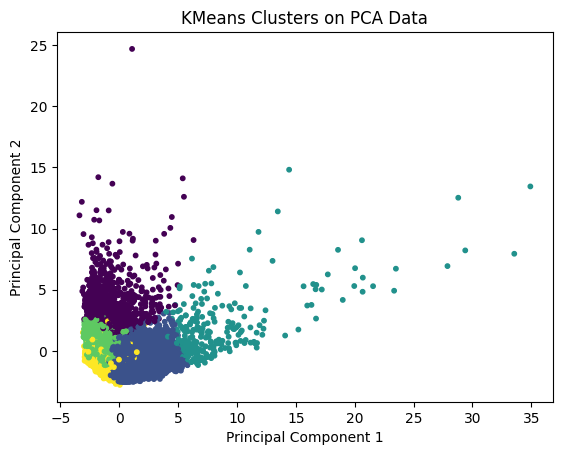

In [50]:
plt.scatter(reduce_data[:, 0], reduce_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [51]:
from sklearn.cluster import AgglomerativeClustering

# Define the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed

# Fit the model to the reduced data
hierarchical_labels = hierarchical.fit_predict(reduce_data)

# Add the labels to the dataframe
df['Hierarchical_Cluster'] = hierarchical_labels


In [52]:
df['Hierarchical_Cluster'] = hierarchical_labels


In [53]:
from sklearn.metrics import silhouette_score

silhouette_avg_hierarchical = silhouette_score(reduce_data, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")


Silhouette Score for Hierarchical Clustering: 0.15301929044581505


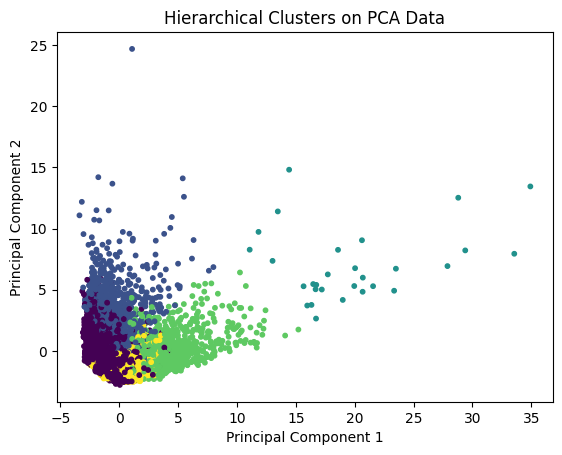

In [54]:
plt.scatter(reduce_data[:, 0], reduce_data[:, 1], c=hierarchical_labels, cmap='viridis', s=10)
plt.title('Hierarchical Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
